In [13]:
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np
import sys 
import os 
from utils import read_data, plot_data, plot_decision_function

%matplotlib inline

Displaying data.


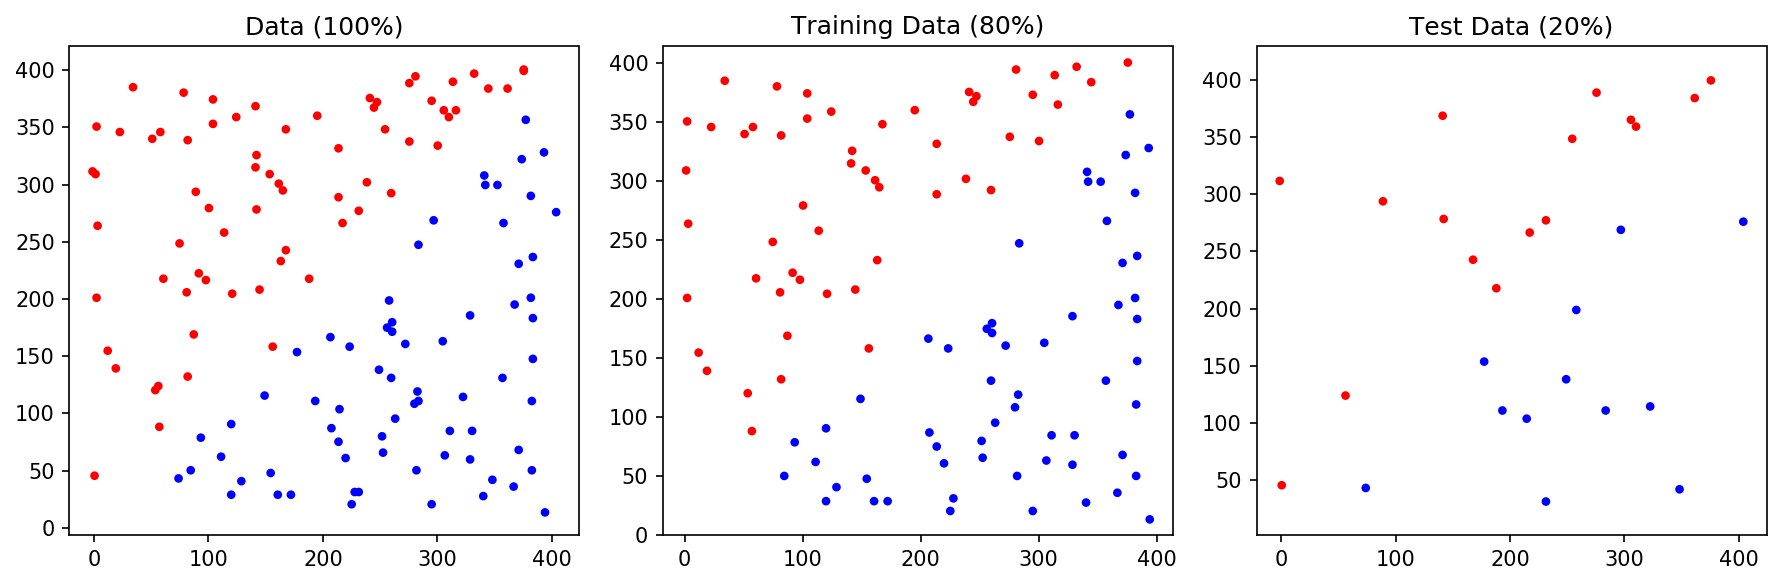

In [4]:
# Read data
working_path = 'Linear-Data-Without-Noise'
x, labels = read_data(working_path + "/points_class_0.txt", working_path + "/points_class_1.txt")

# Split data to train and test on 80-20 ratio
X_train, X_test, y_train, y_test = train_test_split(x, labels, test_size = 0.2, random_state=0)

print("Displaying data.")  
# Plot traning and test data
plot_data(X_train, y_train, X_test, y_test)

In [5]:
print('Training Linear SVM')
# Create a linear SVM classifier 
clf = svm.SVC(kernel='linear')

# Train classifier 
clf.fit(X_train, y_train)

Training Linear SVM


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

Displaying decision function. Close window to continue.


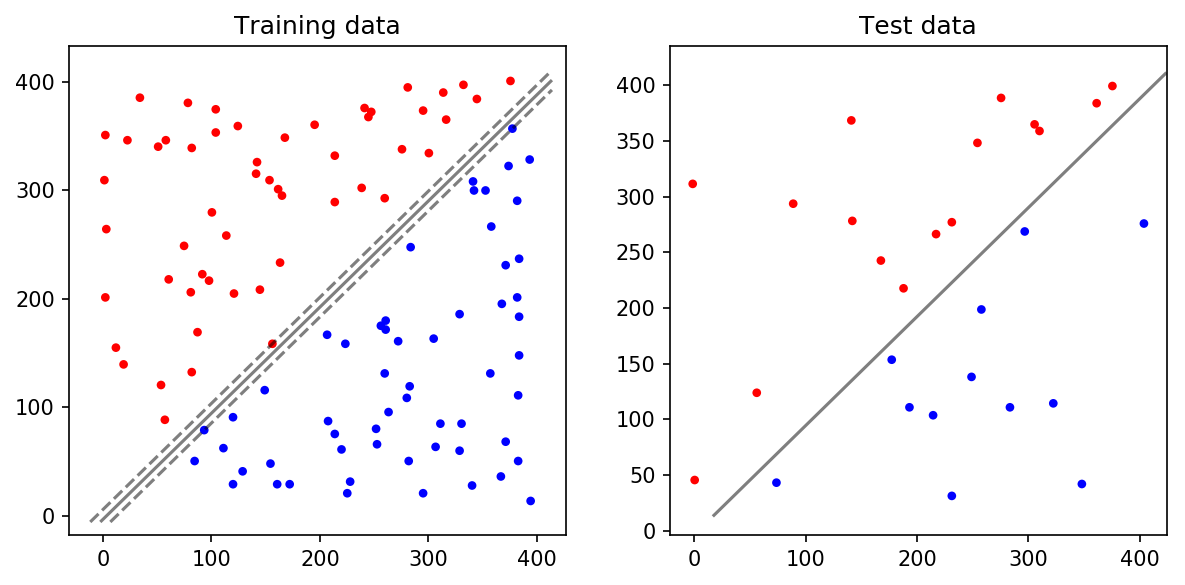

Accuracy: 100.0%


In [6]:
print("Displaying decision function. Close window to continue.")  
# Plot decision function on training and test data
plot_decision_function(X_train, y_train, X_test, y_test, clf)

# Make predictions on unseen test data
clf_predictions = clf.predict(X_test)
print("Accuracy: {}%".format(clf.score(X_test, y_test) * 100 ))

**Linear Data with noise**

Displaying data.


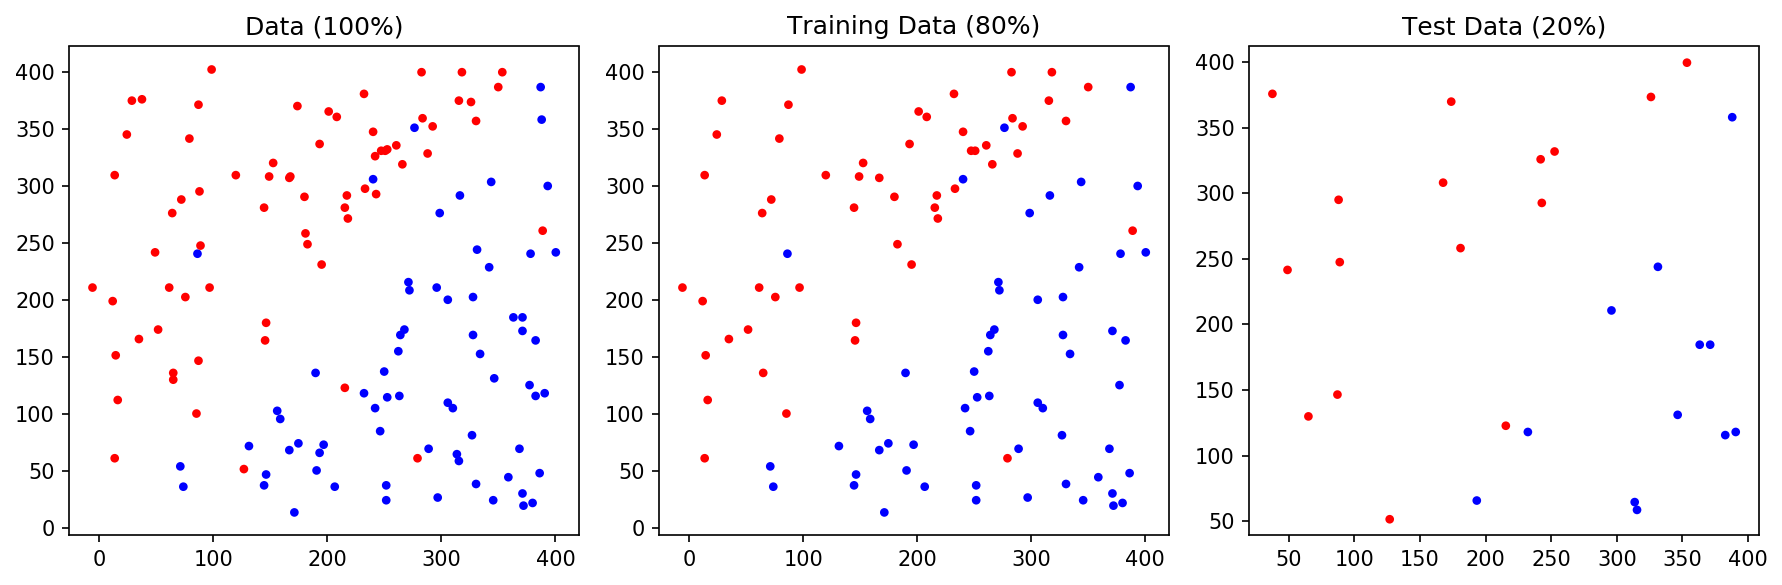

In [7]:
# Read data
working_path = 'Linear-Data-With-Noise'
x, labels = read_data(working_path + "/points_class_0.txt", working_path + "/points_class_1.txt")

# Split data to train and test on 80-20 ratio
X_train, X_test, y_train, y_test = train_test_split(x, labels, test_size = 0.2, random_state=0)

print("Displaying data.")  
# Plot traning and test data
plot_data(X_train, y_train, X_test, y_test)

Training SVM with C=1 ...
Display decision function (C=1) ...


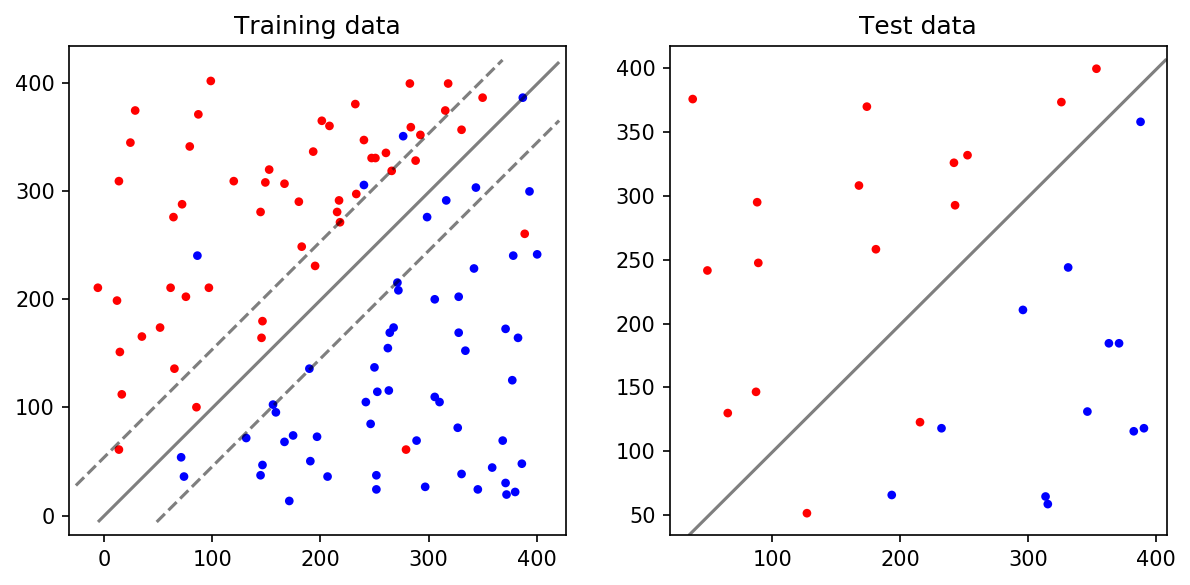

In [8]:
print("Training SVM with C=1 ...")
# make a classifier and fit on training data
clf_1 = svm.SVC(kernel='linear', C=1)
clf_1.fit(X_train, y_train)

print("Display decision function (C=1) ...")
# Plot decision function on training and test data
plot_decision_function(X_train, y_train, X_test, y_test, clf_1)

Training SVM with C=100 ...
Display decision function (C=100) ...


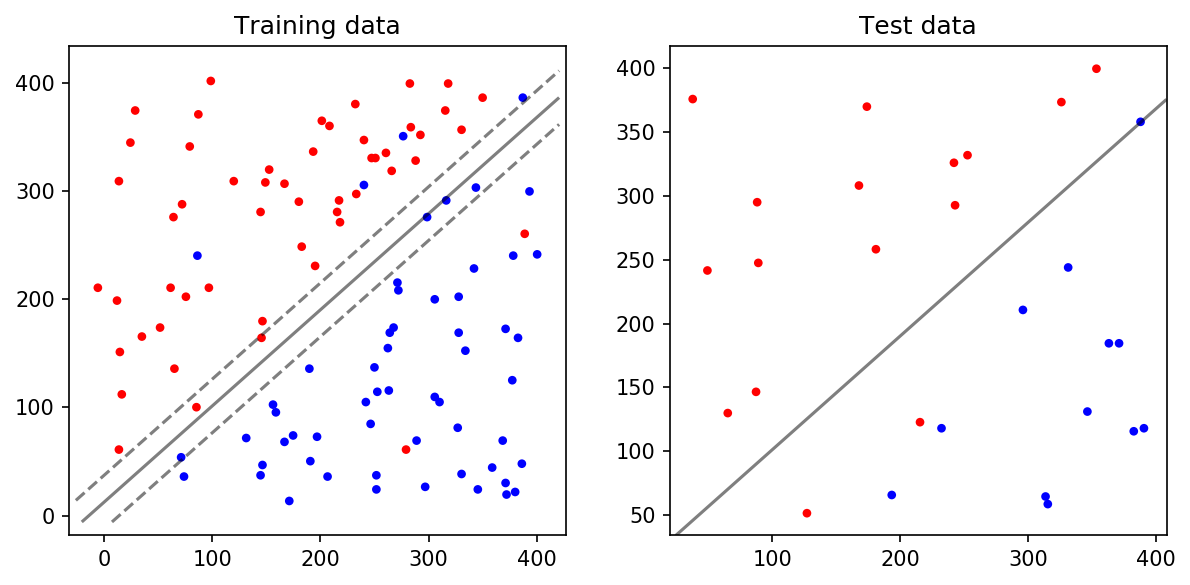

In [9]:
print("Training SVM with C=100 ...")
# make a classifier and fit on training data
clf_100 = svm.SVC(kernel='linear', C=100)
clf_100.fit(X_train, y_train)

print("Display decision function (C=100) ...")
# Plot decision function on training and test data
plot_decision_function(X_train, y_train, X_test, y_test, clf_100)

**Non-Linear Data**

Displaying data.


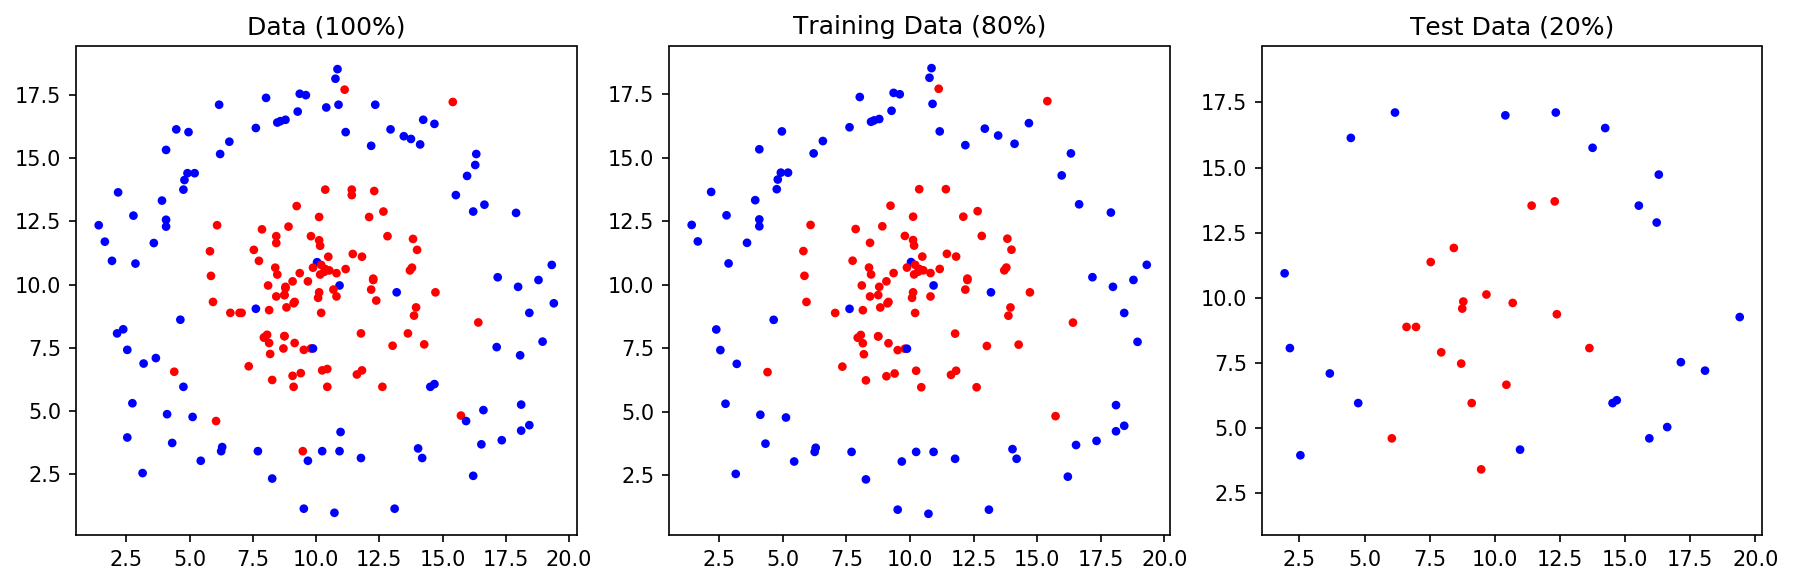

In [10]:
# Read data
working_path = 'Non-Linear-Data'
x, labels = read_data(working_path + "/points_class_0.txt", working_path + "/points_class_1.txt")

# Split data to train and test on 80-20 ratio
X_train, X_test, y_train, y_test = train_test_split(x, labels, test_size = 0.2, random_state=0)

print("Displaying data.")  
# Plot traning and test data
plot_data(X_train, y_train, X_test, y_test)

Training SVM ...
Displaying decision function.


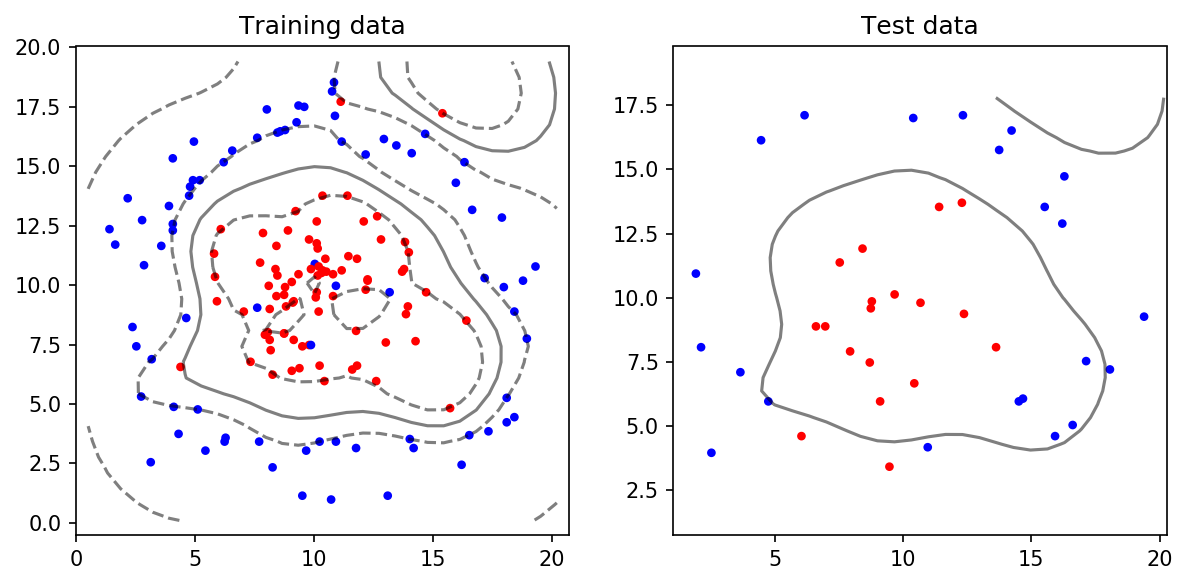

In [11]:
print("Training SVM ...")
# make a classifier
clf = svm.SVC(C = 10.0, kernel='rbf', gamma=0.1)

# Train classifier
clf.fit(X_train, y_train)

# Make predictions on unseen test data
clf_predictions = clf.predict(X_test)

print("Displaying decision function.")
# Plot decision function on training and test data
plot_decision_function(X_train, y_train, X_test, y_test, clf)

Performing grid search ... 
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.4s finished


Best Parameters:
 {'C': 1, 'gamma': 0.01}
Best Estimators:
 SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Displaying decision function for best estimator. Close window to continue.


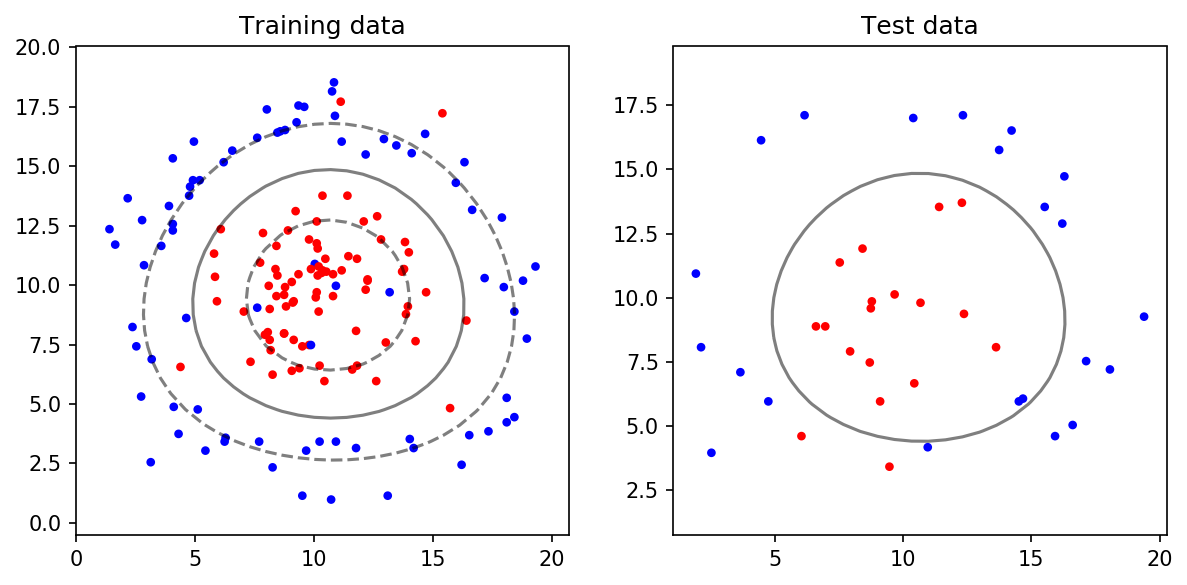

In [17]:
# Grid Search
print("Performing grid search ... ")

# Parameter Grid
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001, 0.00001, 10]}

# Make grid search classifier
clf_grid = GridSearchCV(svm.SVC(), param_grid, cv=5, iid=False, verbose=1)

# Train the classifier
clf_grid.fit(X_train, y_train)

# clf = grid.best_estimator_()
print("Best Parameters:\n", clf_grid.best_params_)
print("Best Estimators:\n", clf_grid.best_estimator_)

print("Displaying decision function for best estimator. Close window to continue.")
# Plot decision function on training and test data
plot_decision_function(X_train, y_train, X_test, y_test, clf_grid)